<a href="https://colab.research.google.com/github/Azimoj/WCS/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In such type of data, Machine Learning practitioners often suggest taking the log of the continuous variable like Income, to improve the accuracy of the model. The reason behind doing this is that the “income” variable spans a very large range of values starting from 12K to 700K.


https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [ ]:
# importation des librairies
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/WCS/W2/train_clean.csv')

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,MSZoning,Street,RoofStyle,RoofMatl,Exterior1st,ExterQual,Foundation,BsmtCond,Heating,CentralAir,KitchenQual,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition,SalePrice
0,7,1710,548,856,8,2003,196.0,0,706,65.0,0,854,61,1,8450,1,150,RL,Pave,Gable,CompShg,VinylSd,Gd,PConc,TA,GasA,Y,Gd,Attchd,RFn,TA,TA,WD,Normal,208500
1,6,1262,460,1262,6,1976,0.0,1,978,80.0,298,0,0,0,9600,0,284,RL,Pave,Gable,CompShg,MetalSd,TA,CBlock,TA,GasA,Y,TA,Attchd,RFn,TA,TA,WD,Normal,181500
2,7,1786,608,920,6,2001,162.0,1,486,68.0,0,866,42,1,11250,1,434,RL,Pave,Gable,CompShg,VinylSd,Gd,PConc,TA,GasA,Y,Gd,Attchd,RFn,TA,TA,WD,Normal,223500
3,7,1717,642,756,7,1915,0.0,1,216,60.0,0,756,35,0,9550,1,540,RL,Pave,Gable,CompShg,Wd Sdng,TA,BrkTil,Gd,GasA,Y,Gd,Detchd,Unf,TA,TA,WD,Abnorml,140000
4,8,2198,836,1145,9,2000,350.0,1,655,84.0,192,1053,84,1,14260,1,490,RL,Pave,Gable,CompShg,VinylSd,Gd,PConc,TA,GasA,Y,Gd,Attchd,RFn,TA,TA,WD,Normal,250000


## **Preprocessing**

In [ ]:
cat=[feature for feature in data.columns if data[feature].dtypes=='O']
cat

['MSZoning',
 'Street',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SaleCondition']

In [ ]:
num =[feature for feature in data.columns if data[feature].dtypes != 'O']
num

['OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'YearBuilt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'SalePrice']

***Creating pipeline***

In [ ]:
# split "SiteEnergyUse" et "SiteEnergyUse" into train test sets
X= data.drop(columns=['SalePrice'], axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=34)

# traitement des variables discrete
numeric_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'YearBuilt', 'MasVnrArea', 'Fireplaces',
 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())])

# traitement des variables continues : imputation par médiane + log + standardcaler
numeric_log_features = ['LotFrontage','MasVnrArea','MasVnrArea']
numeric_log_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                          ('log', FunctionTransformer()),
                                          ('scaler', StandardScaler())])

categorical_features = ['MSZoning', 'Street', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtCond',
 'Heating', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])


# couche de preprocessing avec les deux parties ci-dessus appliquées aux données continues et catégorielles
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('num_log', numeric_log_transformer, numeric_log_features),
                                               ('cat', categorical_transformer, categorical_features)])
from sklearn import set_config
set_config(display='diagram')

preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['OverallQual', 'GrLivArea', 'GarageArea',
                                  'TotalBsmtSF', 'TotRmsAbvGrd', 'YearBuilt',
                                  'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
                                  'LotFrontage', 'WoodDeckSF', '2ndFlrSF',
                                  'OpenPorchSF', 'HalfBath', 'LotArea',
                                  'BsmtFullBath', 'BsmtUnfSF']...
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Other',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSZoning', 'Street', 'RoofStyle', 'RoofMatl',
                                  'Exterior1st', 'ExterQual', 'Foundation',
                                  'BsmtCond', 'Heating', 'CentralAir',
                                  'KitchenQual', 'GarageType', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'SaleType',
                                  'SaleCondition'])])

In [ ]:
pip= Pipeline(steps=[('preprocessor', preprocessor)])
pip['preprocessor'].transform(X_train)

array([[-1.49531617, -1.2801214 , -2.1102519 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.78779082, -1.16416487, -0.92818424, ...,  0.        ,
         1.        ,  0.        ],
       [-1.49531617, -1.74001677, -2.1102519 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.62725986,  0.02881159, -0.18491442, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.7498359 ,  1.53428106,  1.65982753, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.33478521,  0.25679391,  0.04791709, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
pip= Pipeline(steps=[('preprocessor', preprocessor)])
# pour s'assurer que ça marche, on voit bien que les données ont été transformées, donc le step du preprocessor marche
pd.DataFrame.sparse.from_spmatrix(pip['preprocessor'].transform(X_train)).head(5)

AttributeError: ignored

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(952, 34) (952,)
(239, 34) (239,)


In [ ]:
# RandomForestRegressor
pipe_RFR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(RandomForestRegressor()))])

param_RFR = {'preprocessor__num_log__log__func':[None,np.log1p],
             'model__regressor__max_features' : ['sqrt', 'log2'],
             'model__regressor__n_estimators':[100,250],
             'model__regressor__max_depth':[5,10,15],
             'model__regressor__min_samples_split': [2, 5, 10],
             'model__regressor__bootstrap' : [True, False],
             'model__regressor__min_samples_leaf': [1,2,5],
             'model__regressor__n_jobs': [-1]}

grid_RFR = GridSearchCV( pipe_RFR, param_RFR,cv=4, verbose=5)
grid_RFR.fit(X_train, y_train)

[CV 4/4] END model__regressor__bootstrap=False, model__regressor__max_depth=15, model__regressor__max_features=log2, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=10, model__regressor__n_estimators=100, model__regressor__n_jobs=-1, preprocessor__num_log__log__func=None;, score=0.817 total time=   0.3s
[CV 1/4] END model__regressor__bootstrap=False, model__regressor__max_depth=15, model__regressor__max_features=log2, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=10, model__regressor__n_estimators=100, model__regressor__n_jobs=-1, preprocessor__num_log__log__func=<ufunc 'log1p'>;, score=0.850 total time=   0.3s
[CV 2/4] END model__regressor__bootstrap=False, model__regressor__max_depth=15, model__regressor__max_features=log2, model__regressor__min_samples_leaf=2, model__regressor__min_samples_split=10, model__regressor__n_estimators=100, model__regressor__n_jobs=-1, preprocessor__num_log__log__func=<ufunc 'log1p'>;, score=0.742 tota

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['OverallQual',
                                                                          'GrLivArea',
                                                                          'GarageArea',
                                                                          'TotalBsmtSF',
                                                                          'TotRmsAbvGrd',
                                                                          'YearBuilt',
                                                                          'MasVnrArea',
                                                                          'Fireplaces',
                                                                          'BsmtFinSF1',
                                                                          'LotFrontage',
                                                                          'WoodDeckSF',
                                                                          '2ndFlrSF',
                                                                          'O...
             param_grid={'model__regressor__bootstrap': [True, False],
                         'model__regressor__max_depth': [5, 10, 15],
                         'model__regressor__max_features': ['sqrt', 'log2'],
                         'model__regressor__min_samples_leaf': [1, 2, 5],
                         'model__regressor__min_samples_split': [2, 5, 10],
                         'model__regressor__n_estimators': [100, 250],
                         'model__regressor__n_jobs': [-1],
                         'preprocessor__num_log__log__func': [None,
                                                              <ufunc 'log1p'>]},
             verbose=5)

In [ ]:
grid_RFR.best_params_

{'model__regressor__bootstrap': False,
 'model__regressor__max_depth': 15,
 'model__regressor__max_features': 'sqrt',
 'model__regressor__min_samples_leaf': 1,
 'model__regressor__min_samples_split': 2,
 'model__regressor__n_estimators': 100,
 'model__regressor__n_jobs': -1,
 'preprocessor__num_log__log__func': None}

In [ ]:
# RandomForestRegressor best params
RFR = Pipeline(steps=[('preprocessor', preprocessor),
                ('model',TransformedTargetRegressor(regressor= RandomForestRegressor(bootstrap= False,
                  max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1,min_samples_split= 2,
                  n_estimators = 100, n_jobs= -1  )))])
RFR_fit = RFR.fit(X_train, y_train)
RFR_Score= RFR.score(X_test, y_test)
RFR_Score

0.8792486729222266

In [ ]:
print("score d'entrainement = ",RFR_Score,"\n")
y_pred = RFR_fit.predict(X_test)
RMSLE_RFR= mean_squared_log_error(y_test,y_pred)
RMSE_RFR = mean_squared_error(y_test,y_pred , squared= False)

print("score de la prédiction:",RFR_Score)#, accuracy_score(y_test, y_pred)),
print("RMSLE = ",RMSLE_RFR)
print("RMSE = ",RMSE_RFR)

score d'entrainement =  0.8792486729222266 

score de la prédiction: 0.8792486729222266
RMSLE =  0.015482506844876292
RMSE =  26837.27638195288


In the case of **RMSE**, the *presence of outliers can explode the error term to a very high value*. But, in the case of **RMLSE** the o*utliers are drastically scaled down therefore nullifying their effect*. We can clearly see that the value of the RMSE explodes in magnitude as soon as it encounters an outlier.

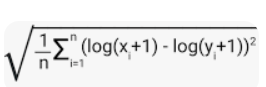

In [ ]:
# GradientBoostingRegressor
pipe_gbr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(GradientBoostingRegressor()))])

grid_gbr = [{'preprocessor__num_log__log__func':[None,np.log1p],
             'model__func':[np.log],
             'model__inverse_func':[np.exp],
             'model__regressor__n_estimators':np.linspace(1200,1800,3).astype(int),
             'model__regressor__learning_rate':[0.16,0.18,0.2],
             'model__regressor__max_depth':[4],
             'model__regressor__subsample':[0.7,0.8,0.9],
             'model__regressor__random_state':[1]},
            {'preprocessor__num_log__log__func':[None,np.log1p],
             'model__func':[None],
             'model__inverse_func':[None],
             'model__regressor__n_estimators':np.linspace(1200,1800,3).astype(int),
             'model__regressor__learning_rate':[0.16,0.18,0.2],
             'model__regressor__max_depth':[4],
             'model__regressor__subsample':[0.7,0.8,0.9],
             'model__regressor__random_state':[1]}
            ]

gs_gbr = GridSearchCV(estimator=pipe_gbr,
                      param_grid=grid_gbr,
                      cv=4,
                      verbose=5)

gs_gbr.fit(X_train, y_train)

In [ ]:
gs_gbr.best_params_

{'model__func': None,
 'model__inverse_func': None,
 'model__regressor__learning_rate': 0.2,
 'model__regressor__max_depth': 4,
 'model__regressor__n_estimators': 1200,
 'model__regressor__random_state': 1,
 'model__regressor__subsample': 0.8,
 'preprocessor__num_log__log__func': <ufunc 'log1p'>}

In [ ]:
# GradientBoostingRegressor best params
GBR= Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', GradientBoostingRegressor(n_estimators=120, learning_rate=0.2,
                                      max_depth=4, subsample=0.8, random_state=1))])

GBR_fit= GBR.fit(X_train, y_train)
GBR_Score= GBR.score(X_test, y_test)

In [ ]:
print("score d'entrainement = ",GBR_Score,"\n")
y_pred = GBR.predict(X_test)
RMSLE_gbr= mean_squared_log_error(y_test,y_pred)
RMSE_gbr= np.sqrt(mean_squared_error(y_test,y_pred))

print("score de la prédiction:")#, accuracy_score(y_test, y_pred)),
print("RMSLE = ",RMSLE_gbr)
print("RMSE = ",RMSE_gbr)


score d'entrainement =  0.896596562104748 

score de la prédiction:
RMSLE =  0.0161337637944678
RMSE =  24834.760242656477


In [ ]:
# Seprate Vector Regression
pipe_SVR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(SVR())) ])

param_SVR = [{ 'preprocessor__num_log__log__func':[None,np.log1p],

              'model__regressor__C' : range(100,5000,1000),
              'model__regressor__epsilon' : [1,2],
              'model__regressor__kernel':['poly','rbf'],
              'model__regressor__gamma' : ['auto', 'scale'],
              'model__regressor__degree' : [3, 5]
                }]

GS_SVR = GridSearchCV(pipe_SVR, param_SVR, cv=4, verbose=5)
GS_SVR.fit(X_train, y_train)

In [ ]:
GS_SVR.best_params_

{'model__regressor__C': 4100,
 'model__regressor__degree': 3,
 'model__regressor__epsilon': 1,
 'model__regressor__gamma': 'auto',
 'model__regressor__kernel': 'rbf',
 'preprocessor__num_log__log__func': <ufunc 'log1p'>}

In [ ]:
# SVR best params
SVR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(SVR(C=4100, degree=3, epsilon=1, gamma= 'auto',
                                                                   kernel= 'rbf'))) ])

SVR_fit = SVR.fit(X_train, y_train)
SVR_Score = SVR.score(X_test, y_test)
SVR_Score

0.7219180087971879

In [ ]:
print("score d'entrainement = ",SVR_Score,"\n")
y_pred = SVR.predict(X_test)
RMSLE_SVR= mean_squared_log_error(y_test,y_pred)
RMSE_SVR = mean_squared_error(y_test,y_pred, squared= False)

print("score de la prédiction:")#, accuracy_score(y_test, y_pred)),
print("RMSLE = ",RMSLE_SVR)
print("RMSE = ",RMSE_SVR)

score d'entrainement =  0.7219180087971879 

score de la prédiction:
RMSLE =  0.023822377394237284
RMSE =  40726.671237498536


In [ ]:
model_df = {'models': ['Gradient Boosting', 'RandomForestRegressor', 'SVR'],
            'mean_squared_log_error': [RMSLE_gbr, RMSLE_RFR, RMSLE_SVR ],
            'Root_mean_squared_error': [RMSE_gbr, RMSE_RFR, RMSE_SVR],

           'Score': [GBR_Score,RFR_Score, SVR_Score]}
df1= pd.DataFrame(model_df)
df1

,models,mean_squared_log_error,Root_mean_squared_error,Score
0,Gradient Boosting,0.016134,24834.760243,0.896597
1,RandomForestRegressor,0.015483,26837.276382,0.879249
2,SVR,0.023822,40726.671237,0.721918


Text(0.5, 1.0, ' Root mean squared error')

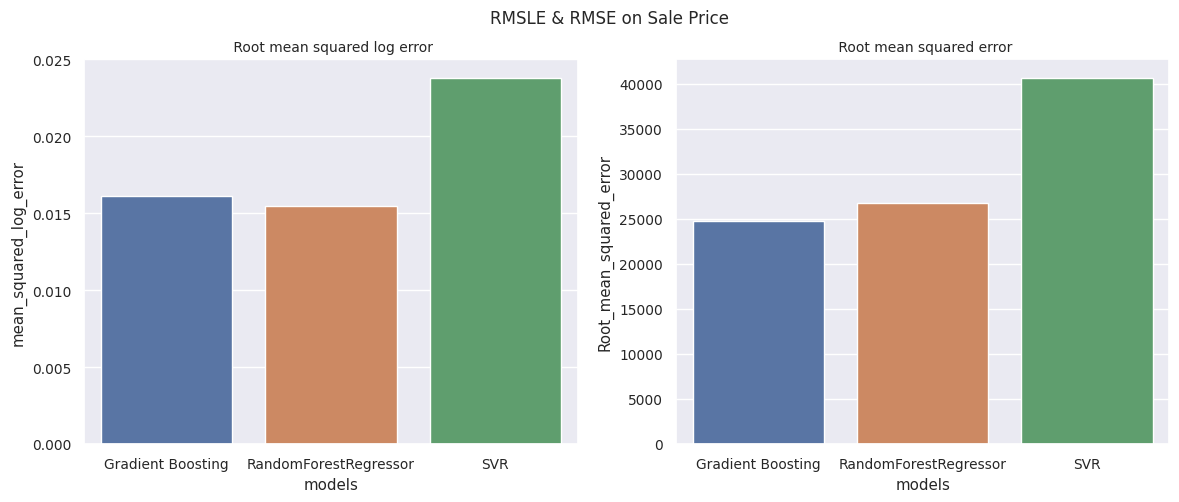

In [ ]:
sns.set(font_scale=0.9)
plt.figure(figsize=(14,5))
plt.suptitle("RMSLE & RMSE on Sale Price",fontsize=12)
plt.subplot(1,2,1)
sns.barplot(x= df1['models'] ,y=df1['mean_squared_log_error'])
plt.title(" Root mean squared log error", fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x= df1['models'] ,y=df1['Root_mean_squared_error'])
plt.title(" Root mean squared error", fontsize=10)

https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

https://www.youtube.com/watch?v=K490SP-_H0U

Robustness to the effect of the outliers
In the case of RMSE, the presence of outliers can explode the error term to a very high value. But, in the case of RMLSE the outliers are drastically scaled down therefore nullifying their effect.

 RMSLE metric only considers the relative error between and the Predicted and the actual value and the scale of the error is not significant. On the other hand, RMSE value Increases in magnitude if the scale of error increases.